In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA & visualizing

In [3]:
df.shape

(30, 2)

In [4]:
df.isnull().values.any()

False

In [5]:
df=df.rename(columns={'YearsExperience':'ye','Salary':'sal'})

In [6]:
df

,ye,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='ye', ylabel='Density'>

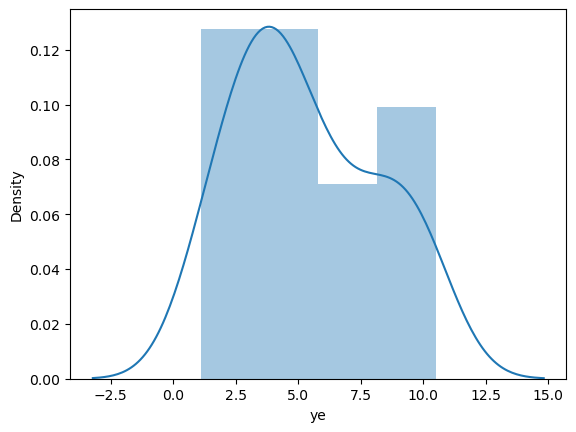

In [7]:
sns.distplot(df['ye'])

<AxesSubplot:xlabel='sal', ylabel='Density'>

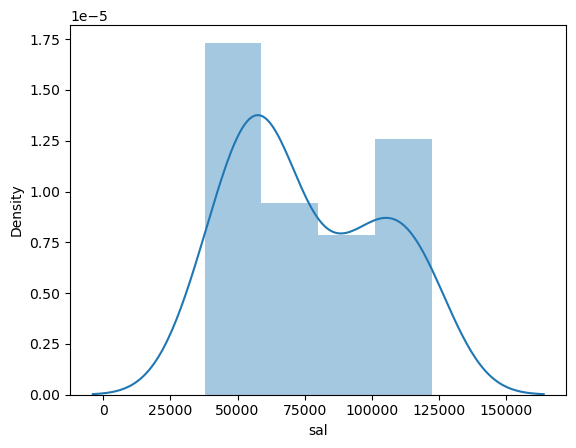

In [8]:
sns.distplot(df['sal'])

In [9]:
#correlation analysis
df.corr()

,ye,sal
ye,1.000000,0.978242
sal,0.978242,1.000000


<AxesSubplot:xlabel='ye', ylabel='sal'>

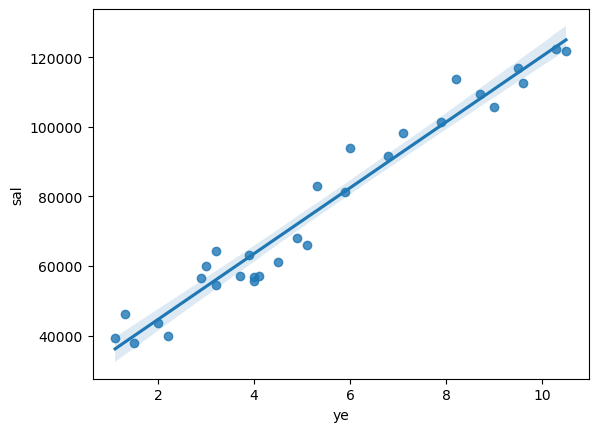

In [10]:
sns.regplot(x=df['ye'],y=df['sal'])


In [11]:
#model building
model=smf.ols("sal~ye",data=df).fit()

In [12]:
#model testing
model.params

Intercept    25792.200199
ye            9449.962321
dtype: float64

In [13]:
model.pvalues, model.tvalues

(Intercept    5.511950e-12
 ye           1.143068e-20
 dtype: float64,
 Intercept    11.346940
 ye           24.950094
 dtype: float64)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    sal   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        12:07:36   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
ye          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#model prediction
pred=model.predict(df.ye)

In [16]:
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

<AxesSubplot:ylabel='Density'>

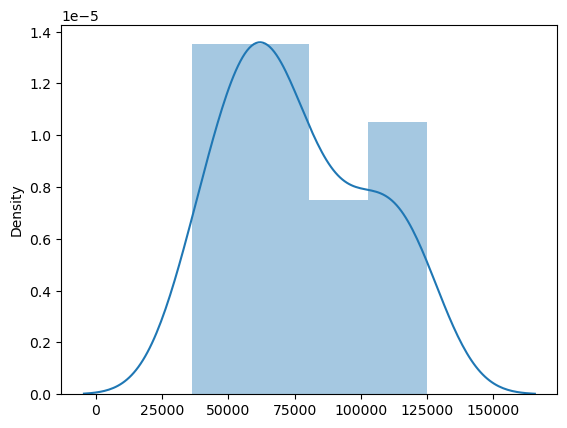

In [17]:
sns.distplot(pred)

# Applying multiple transformation

PatsyError: Error evaluating factor: NameError: name 'experience' is not defined
    salary~np.log(experience)
           ^^^^^^^^^^^^^^^^^^

In [19]:
# Log transformation
model_log=smf.ols("sal~np.log(ye)",data=df).fit()
pred_log=model_log.predict(df.ye)
rmse_log=np.sqrt(np.mean((df.sal-pred_log)**2))

In [20]:
# Square transformation
model_sq=smf.ols("sal~ye**2",data=df).fit()
pred_sq = model_sq.predict(df.ye)
rmse_sq = np.sqrt(np.mean((df.sal - pred_sq)**2))

In [21]:
# Square root transformation
model_sqrt=smf.ols("sal~ np.sqrt(ye)", data=df).fit()
pred_sqrt=model_sqrt.predict(df.ye)
rmse_sqrt=np.sqrt(np.mean((df.sal-pred_sqrt)**2))

In [22]:
print("RMSE for log transformation:", rmse_log)

RMSE for log transformation: 10302.893706228304


In [23]:
print("RMSE for square transformation:", rmse_sq)

RMSE for square transformation: 5592.043608760662


In [24]:
print("RMSE for square root transformation:", rmse_sqrt)

RMSE for square root transformation: 7080.09573498304
